In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from history_plot import plot_accuracy, plot_loss

In [2]:
BASE_DIR = os.getcwd()
LARGE_DATASET_DIR = os.path.join(BASE_DIR, 'large_dataset')
TRAIN_DIR = os.path.join(LARGE_DATASET_DIR, 'train')
TEST_DIR = os.path.join(LARGE_DATASET_DIR, 'test')

In [3]:
train_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

Found 5922 images belonging to 2 classes.


In [5]:
validation_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

Found 1480 images belonging to 2 classes.


In [4]:
test_batch = ImageDataGenerator(rescale=1/255).flow_from_directory(
    TEST_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
)

Found 602 images belonging to 2 classes.


In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 128)      

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(train_batch, validation_data=validation_batch, batch_size=32, epochs=15)

Epoch 1/15
186/186 [==============================] - 71s 376ms/step - loss: 0.2062 - accuracy: 0.9081 - val_loss: 0.0240 - val_accuracy: 0.9959
Epoch 2/15
186/186 [==============================] - 75s 404ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0158 - val_accuracy: 0.9892
Epoch 3/15
186/186 [==============================] - 74s 399ms/step - loss: 2.6789e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/15
186/186 [==============================] - 75s 401ms/step - loss: 5.4404e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 5/15
186/186 [==============================] - 72s 384ms/step - loss: 1.9257e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/15
186/186 [==============================] - 76s 410ms/step - loss: 1.1366e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 7/15
186/186 [==============================] - 77s 414ms/step - loss: 8.1769e-06 - accuracy: 1.0000 - val_l

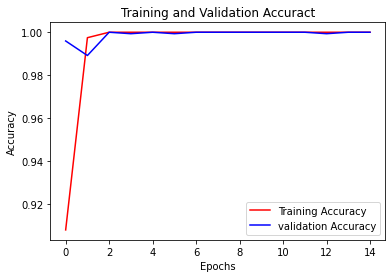

In [24]:
plot_accuracy(history)

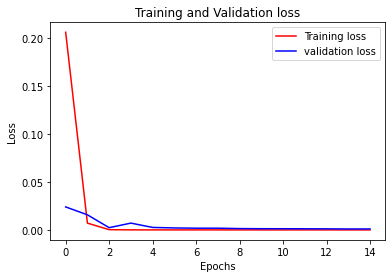

In [25]:
plot_loss(history)

In [26]:
predicted = model.evaluate(test_batch)

19/19 [==============================] - 3s 122ms/step - loss: 0.0206 - accuracy: 0.9917


In [27]:
predicted

[0.020575804635882378, 0.9916943311691284]

In [28]:
model.save('003.h5')